In [1]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#Prophet
from fbprophet import Prophet


from sklearn import metrics

In [2]:
start = datetime.datetime(2015,1,5)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)

In [3]:
df_2492.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,17.153900,16.943001,17.153900,17.153900,1136512.0,14.355721
2015-01-06,17.013300,16.661800,16.943001,16.661800,1451577.0,13.943893
2015-01-07,16.732100,16.240000,16.661800,16.450899,1773755.0,13.767396
2015-01-08,16.802401,16.591499,16.591499,16.661800,1169227.0,13.943893
2015-01-09,16.872700,16.661800,16.802401,16.802401,680627.0,14.061560


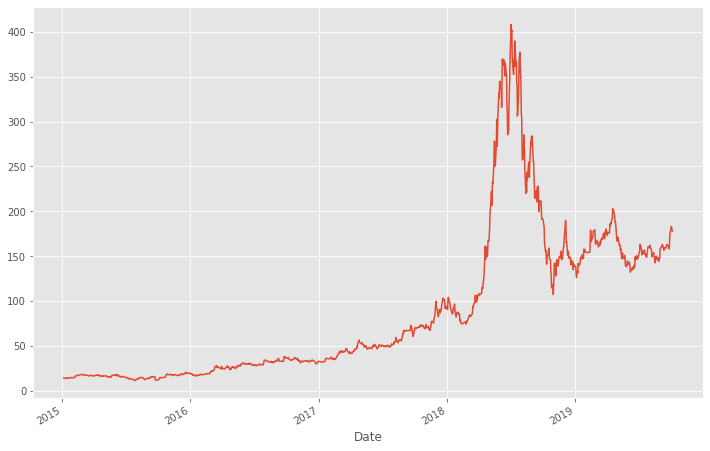

In [4]:
plt.style.use('ggplot')
df_2492['Adj Close'].plot(figsize=(12, 8))

In [5]:
data_set = df_2492.iloc[:, 0:1].values
print('data_set:',data_set.shape)

data_set: (1157, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1)) 
data_set_scaled = sc.fit_transform(data_set)
train_set = data_set_scaled[:1000]
print('train_set:',train_set.shape)
test_set = data_set_scaled[1000:]
print('test_set:',test_set.shape)

train_set: (1000, 1)
test_set: (157, 1)


In [7]:
x_train = [] 
y_train = []
for i in range(50,1000):
    x_train.append(train_set[i-50:i,0])
    y_train.append(train_set[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [8]:
print(x_train.shape)

(950, 50, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(LSTM(units = 50,
               return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,
               return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,
               return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,
               return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 50)            20200     
__________

In [11]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
train_history = model.fit(x_train,y_train,epochs = 100,batch_size = 150,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.


Train on 760 samples, validate on 190 samples
Epoch 1/100
760/760 [==============================] - 11s 15ms/step - loss: 0.0065 - val_loss: 0.1161
Epoch 2/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0033 - val_loss: 0.0663
Epoch 3/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 0.0258
Epoch 4/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0309
Epoch 5/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0011 - val_loss: 0.0228
Epoch 6/100
760/760 [==============================] - 2s 3ms/step - loss: 7.6789e-04 - val_loss: 0.0255
Epoch 7/100
760/760 [==============================] - 2s 3ms/step - loss: 8.1986e-04 - val_loss: 0.0215
Epoch 8/100
760/760 [==============================] - 2s 3ms/step - loss: 7.5873e-04 - val_loss: 0.0216
Epoch 9/100
760/760 [==============================] - 2s 3ms/step - loss: 5.4974e-04 - val_loss: 0.0243
Epoch 10/100
760/760 [=====

760/760 [==============================] - 2s 3ms/step - loss: 2.6300e-04 - val_loss: 0.0551
Epoch 79/100
760/760 [==============================] - 2s 3ms/step - loss: 2.3597e-04 - val_loss: 0.0782
Epoch 80/100
760/760 [==============================] - 2s 3ms/step - loss: 2.2144e-04 - val_loss: 0.0302
Epoch 81/100
760/760 [==============================] - 2s 3ms/step - loss: 2.3161e-04 - val_loss: 0.0999
Epoch 82/100
760/760 [==============================] - 2s 3ms/step - loss: 3.4136e-04 - val_loss: 0.0261
Epoch 83/100
760/760 [==============================] - 2s 3ms/step - loss: 3.6453e-04 - val_loss: 0.0602
Epoch 84/100
760/760 [==============================] - 2s 3ms/step - loss: 2.7611e-04 - val_loss: 0.1003
Epoch 85/100
760/760 [==============================] - 2s 3ms/step - loss: 2.2270e-04 - val_loss: 0.0314
Epoch 86/100
760/760 [==============================] - 2s 3ms/step - loss: 2.4779e-04 - val_loss: 0.1324
Epoch 87/100
760/760 [==============================] - 2s 

### test

In [14]:
x_test = []
y_test = []
for i in range(50,154):
    x_test.append(test_set[i-50:i,0])
    y_test.append(test_set[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)

In [15]:
x_test = x_test.reshape(104,50,1)

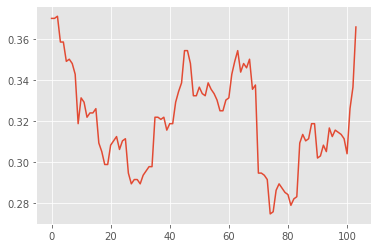

In [16]:
plt.plot(y_test)

In [17]:
predicted_stock_price = model.predict(x_test)

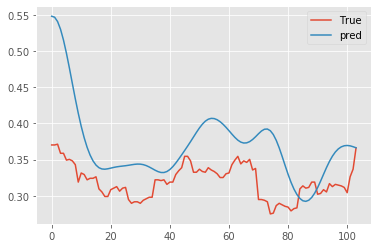

In [18]:
plt.plot(y_test,label='True')
plt.plot(predicted_stock_price,label = 'pred')
plt.legend()
plt.show()

In [19]:
x_test = []
y_test = []
for i in range(50,154):
    x_test.append(test_set[i-50:i,0])
    y_test.append(test_set[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)
x_test = x_test.reshape(104,50,1)

In [20]:
predicted_stock_price = model.predict(x_test)

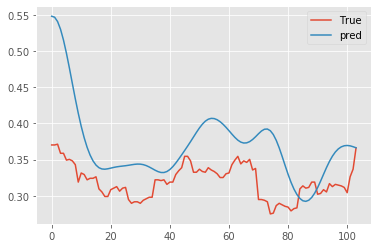

In [21]:
plt.plot(y_test,label='True')
plt.plot(predicted_stock_price,label = 'pred')
plt.legend()
plt.show()